In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

In [4]:
customer_xls = './data/customerlist.xlsx'

In [5]:
customer_df = pd.read_excel(customer_xls, sheet_name='Sheet1')
customer_df.head()

,순번,성별,상품종류,상품가입일,요일,가입경로,금액
0,14,1,예금,20220401,5,비대면,20000000
1,5,1,예금,20220401,5,비대면,10000000
2,13,1,예금,20220401,5,비대면,1500000
3,4,1,예금,20220401,5,비대면,1000000
4,3,2,적금,20220401,5,창구,200000


In [6]:
len(customer_df)

100

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순번      100 non-null    int64 
 1   성별      100 non-null    int64 
 2   상품종류    100 non-null    object
 3   상품가입일   100 non-null    int64 
 4   요일      100 non-null    int64 
 5   가입경로    100 non-null    object
 6   금액      100 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 5.6+ KB


## 데이터 요건 정리

(1) 성별 1 → 남자 / 성별 2 → 여자

(2) '20220402'는 주말이므로 가입경로 창구 → 비대면 데이터 수정

In [8]:
customer_df = customer_df.replace({'성별':1},'남자')
customer_df = customer_df.replace({'성별':2},'여자')
customer_df.loc[customer_df['상품가입일']==20220402,'가입경로'] = '비대면'
customer_df.head(5)

,순번,성별,상품종류,상품가입일,요일,가입경로,금액
0,14,남자,예금,20220401,5,비대면,20000000
1,5,남자,예금,20220401,5,비대면,10000000
2,13,남자,예금,20220401,5,비대면,1500000
3,4,남자,예금,20220401,5,비대면,1000000
4,3,여자,적금,20220401,5,창구,200000


### 1. 상품별 가입 비율

- 예금, 적금, 펀드 상품 가입 실적을 파이그래프 활용하여 비율 나타내기

In [11]:
from functools import *

def count_columns(result_dic, element) :
    if result_dic.get(element) :
        result_dic[element] += 1
    else:
        result_dic[element] = 1

    return result_dic
#     print(result_dic)

def get_group_count(customer_df_column) :
    return reduce(count_columns, customer_df_column, dict())
customer_df['상품종류']
# result1 = get_group_count(customer_df['상품종류'])
# product_name = list(result1.keys())
# product_cnt = list(result1.values())

# plt.figure(figsize=(6,6))
# plt.pie(product_cnt, labels=product_name, autopct='%1.1f%%',shadow=True, startangle=90)  
# plt.title("\n수신상품 가입실적현황\n", fontsize=15)
# plt.legend()
# plt.show()

0     예금
1     예금
2     예금
3     예금
4     적금
      ..
95    적금
96    펀드
97    적금
98    적금
99    펀드
Name: 상품종류, Length: 100, dtype: object

In [10]:
result1 = get_group_count(customer_df['상품종류'])

In [11]:
product_name = list(result1.keys())

In [12]:
product_cnt = list(result1.values())

### 2. 가입경로별 상품 실적 비율

- 가입경로(창구/비대면)에 따른 실적 현황(파이 그래프)
- 가입경로별 수신상품 실적 비교 그래프(좌우 bar그래프)

(1) 가입경로별 실적현황

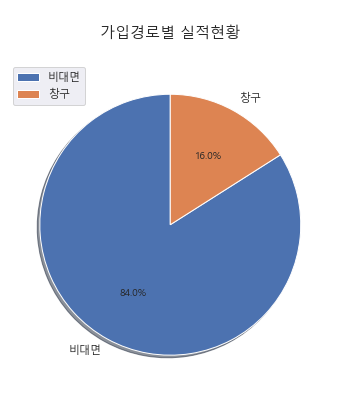

In [13]:
from functools import *

def count_columns(result_dic, element) :
    if result_dic.get(element) :
        result_dic[element] += 1
    else:
        result_dic[element] = 1

    return result_dic

def get_group_count(customer_df_column) :
    return reduce(count_columns, customer_df_column, dict())

result2 = get_group_count(customer_df['가입경로'])
channel_name = list(result2.keys())
channel_cnt= list(result2.values())

plt.figure(figsize=(6,6))
plt.pie(channel_cnt, labels=channel_name, autopct='%1.1f%%',shadow=True, startangle=90)  
plt.title("\n가입경로별 실적현황\n", fontsize=15)
plt.legend()
plt.show()

(2) 가입경로별 상품가입현황

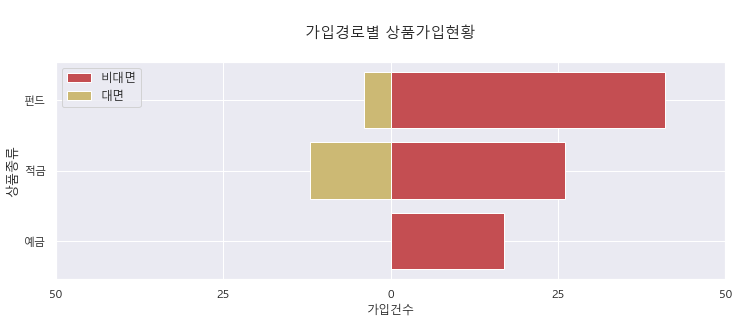

In [14]:
customer_df_columns = []

for idx in range(len(customer_df)):
    element = customer_df['가입경로'][idx], customer_df['상품종류'][idx]
    customer_df_columns.append(element)
    
#customer_df_columns


def get_group_count(customer_df_columns):
#     print('len(customer_df_columns) :', len(customer_df_columns))
    
    def count_columns(result_dic, element_tuple):
        element1, element2 = element_tuple
        # print(element1, ':', element2)
        
        if not (result_dic.get(element1)):
            result_dic[element1] = {}
            
        if result_dic[element1].get(element2):
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1
        
        return result_dic
    
    result = reduce(count_columns, customer_df_columns, dict())
    return result

result3 = get_group_count(customer_df_columns)
dict_element1 = result3['창구']
dict_element2 = result3['비대면']
count_t = [dict_element1[key] for key in dict_element1.keys()]
count_t1 = [0, 12, 4]
tact =np.array(count_t1)
count_ut = [dict_element2[key] for key in dict_element2.keys()]  # 비대면


t = ['예금', '적금', '펀드']
plt.figure(figsize=(12,4))
plt.barh(t,count_ut,color='r',label='비대면')
plt.barh(t,-tact,color='y',label='대면')
plt.xlabel('가입건수')
plt.ylabel('상품종류', fontsize=13)
plt.legend(fontsize=12)
plt.xticks([-50,-25,0,25,50],('50','25','0','25','50'), fontsize=12)
plt.title("\n가입경로별 상품가입현황\n", fontsize=15)
plt.show()

### 3. 성별 상품 실적 비율

- 성별(남/녀)에 따른 상품가입 비율(파이 그래프)
- 성별(남/녀)에 따른 가입경로 비교 그래프(좌우 bar그래프)

(1) 성별 수신상품가입비율

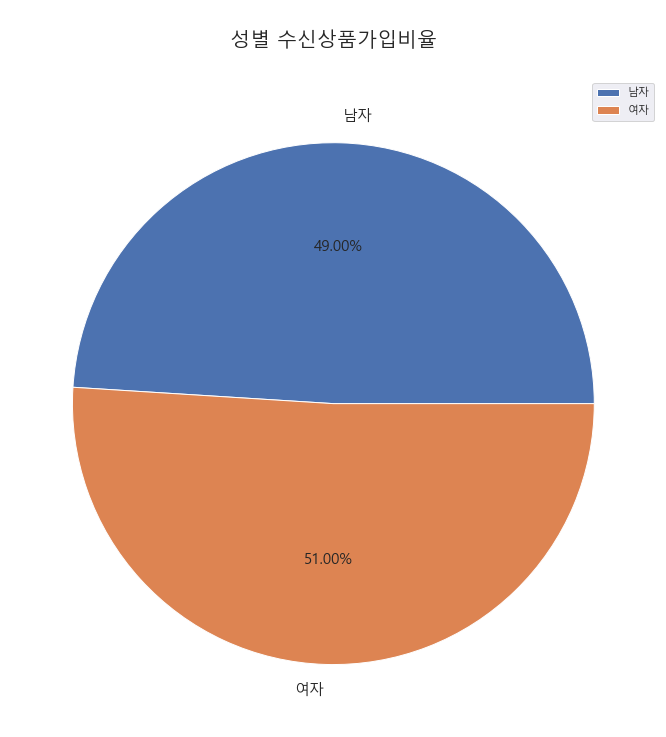

In [15]:
# customer_df.groupby('성별').size()
df_sex = customer_df.groupby('성별').size()
# df_sex
df_sex.plot(kind='pie',
            figsize=(12,12),
            autopct='%.2f%%',
            shadow=False, 
            fontsize=15
            )
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.legend(df_sex.index[:2], loc=1)
plt.title("\n성별 수신상품가입비율\n", fontsize=20)
plt.show()

(2) 성별, 가입경로별 건수

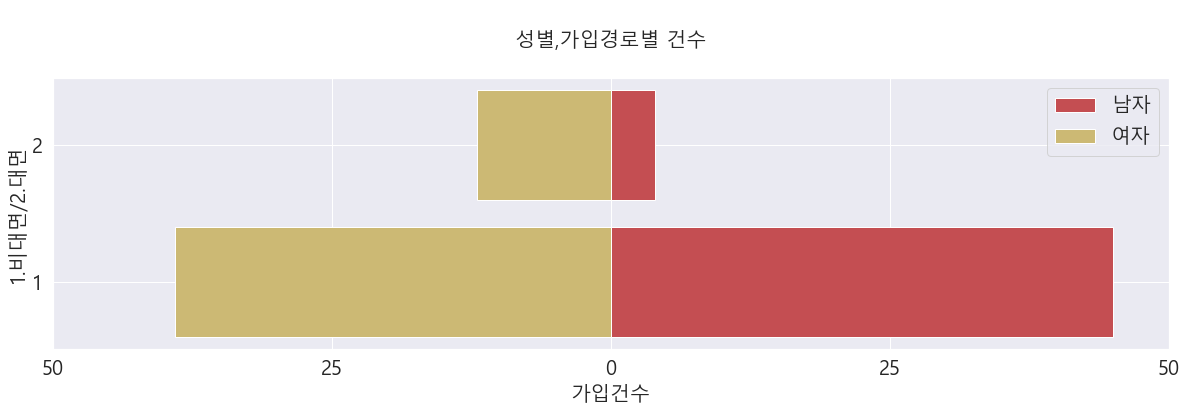

In [16]:
sex_merc = customer_df.loc[:,['성별','가입경로']]
data = sex_merc.groupby(['성별','가입경로']).value_counts()

# data[2:4]

t  = np.arange(2)+1 #
y  = data[0:2] #남자
y1 = data[2:4] #여자

plt.figure(figsize=(20,5))
plt.barh(t,y, color='r', label='남자')
plt.barh(t, -y1, color='y', label='여자')
plt.xlabel('가입건수', fontsize=20)
plt.ylabel('1.비대면/2.대면', fontsize=20)
plt.legend(fontsize=20)
plt.xticks([-50,-25,0,25,50],('50','25','0','25','50'), fontsize=20)
plt.yticks([1,2],('1','2'), fontsize=20)
plt.title("\n성별,가입경로별 건수\n", fontsize=20)
# Get or set the *x*-limits of the current tick locations and labels.
plt.show() 

### 4. 가입일자별 상품별 가입비율

- 일자별 상품실적 현황 그래프(분할 그래프)
- 요일별 평균가입건수(bar그래프)

(1) 4/1~15일까지 만들기

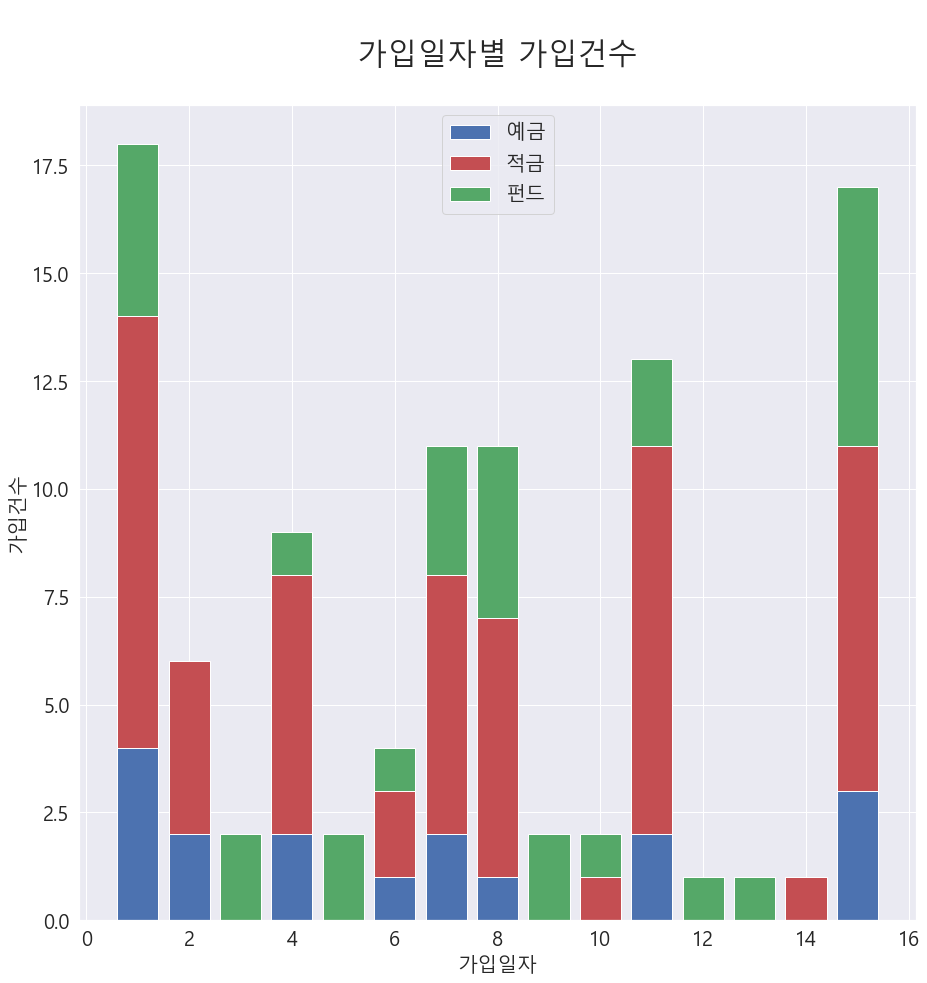

In [17]:
from datetime import datetime

day_merc = customer_df.loc[:,['상품가입일','상품종류']]
day_merc['상품가입일'] = pd.to_datetime(day_merc['상품가입일'], format='%Y%m%d') 
# customer_df.head(10)
# day_merc.tail(10)
day_merc.set_index('상품가입일', inplace=True)   
day_merc['상품가입일자'] = day_merc.index.day
day_merc_num = day_merc.groupby(['상품가입일자','상품종류']).value_counts()
day_merc_num2 = day_merc_num.unstack(1).fillna(0)


A = day_merc_num2.iloc[:,0]#예금
B = day_merc_num2.iloc[:,1]#적금
C = day_merc_num2.iloc[:,2]#펀드

X = day_merc_num2.index

plt.figure(figsize=(15,15))
plt.bar(X, A, color='b', label='예금')
plt.bar(X, B, color='r', bottom=A,label='적금')
plt.bar(X, C, color='g', bottom=A+B,label='펀드')

plt.xlabel('가입일자', fontsize=20)
plt.ylabel('가입건수', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("\n가입일자별 가입건수\n", fontsize=30)

plt.show()

(2) 요일별 상품가입건수 
- 요일 평균으로 bar그래프로 그린다.

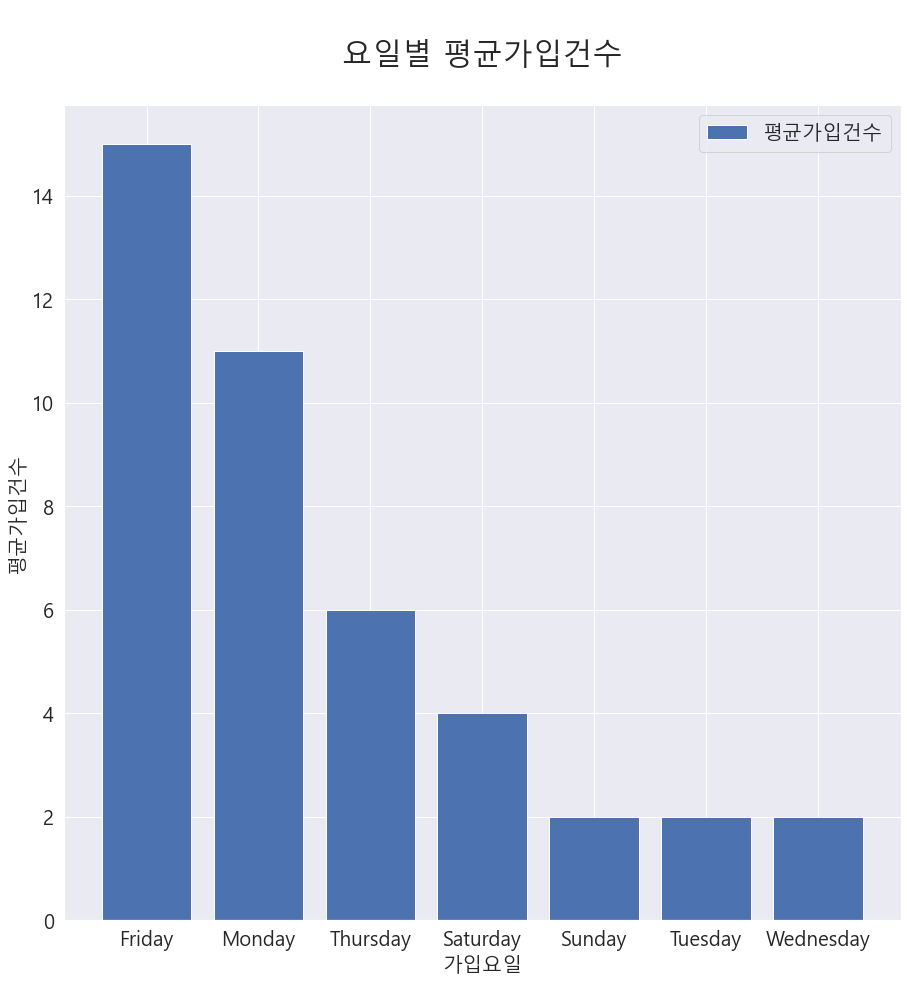

In [18]:
day_merc2 = day_merc.reset_index()
day_merc2['상품가입요일'] = day_merc2['상품가입일'].dt.day_name() 
day_merc3 = day_merc2.drop(['상품가입일','상품종류'], axis='columns')
weekday_num = day_merc3.groupby(['상품가입일자','상품가입요일']).value_counts()
weekday_num2 = round(weekday_num.groupby(['상품가입요일']).mean(),0)
weekday_num3 = weekday_num2.sort_values(ascending=False)

A = weekday_num3.values#예금

X = weekday_num3.index

plt.figure(figsize=(15,15))
plt.bar(X, A, color='b', label='평균가입건수')

plt.xlabel('가입요일', fontsize=20)
plt.ylabel('평균가입건수', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("\n요일별 평균가입건수\n", fontsize=30)

plt.show()

### 5. subplot 함수

In [19]:
def draw_product(pie):
    if pie=='y':
        def count_columns(result_dic, element) :
            if result_dic.get(element) :
                result_dic[element] += 1
            else:
                result_dic[element] = 1

            return result_dic

        def get_group_count(customer_df_column) :
            return reduce(count_columns, customer_df_column, dict())

        result1 = get_group_count(customer_df['상품종류'])
        product_name = list(result1.keys())
        product_cnt = list(result1.values())

        plt.pie(product_cnt, labels=product_name, autopct='%1.1f%%',shadow=True, startangle=90, textprops={'size': 15})  
        plt.title("\n수신상품 가입실적현황\n", fontsize=20)
        plt.legend()
        
    else:
        print("Not Operation !!")
        return

In [20]:
def draw_channel(pie):
    if pie=='y':
        def count_columns(result_dic, element) :
            if result_dic.get(element) :
                result_dic[element] += 1
            else:
                result_dic[element] = 1
            return result_dic

        def get_group_count(customer_df_column) :
            return reduce(count_columns, customer_df_column, dict())

        result2 = get_group_count(customer_df['가입경로'])
        channel_name = list(result2.keys())
        channel_cnt= list(result2.values())

        plt.pie(channel_cnt, labels=channel_name, autopct='%1.1f%%',shadow=True, startangle=0, textprops={'size': 15})  
        plt.title("\n가입경로별 실적현황\n", fontsize=20)
        plt.legend(loc=1)
        
    elif pie=='n':
        def get_group_count(customer_df_columns):
#             print('len(customer_df_columns) :', len(customer_df_columns))

            def count_columns(result_dic, element_tuple):
                element1, element2 = element_tuple
                # print(element1, ':', element2)

                if not (result_dic.get(element1)):
                    result_dic[element1] = {}

                if result_dic[element1].get(element2):
                    result_dic[element1][element2] += 1
                else :
                    result_dic[element1][element2] = 1

                return result_dic

            result = reduce(count_columns, customer_df_columns, dict())
            return result
        
        result3 = get_group_count(customer_df_columns)
        dict_element1 = result3['창구']
        dict_element2 = result3['비대면']
        count_t = [dict_element1[key] for key in dict_element1.keys()]
        count_t1 = [0, 12, 4]
        tact =np.array(count_t1)
        count_ut = [dict_element2[key] for key in dict_element2.keys()]

        t = ['예금', '적금', '펀드']

        plt.barh(t,count_ut,color='r',label='비대면')
        plt.barh(t,-tact,color='y',label='대면')
#         plt.xlabel('가입건수')
#         plt.ylabel('상품종류', fontsize=14)
        plt.legend(fontsize=12)
        plt.xticks([-50,-25,0,25,50],('50','25','0','25','50'), fontsize=15)
        plt.title("\n가입경로별 상품가입현황\n", fontsize=20)

    else:
        print("Not Operation !!")
        return


In [21]:
def draw_sex(pie):
    if pie=='n':
        t  = ['비대면','대면'] #
        y  = data[0:2] #남자
        y1 = data[2:4] #여자

        plt.barh(t,y, color='r', label='남자')
        plt.barh(t, -y1, color='y', label='여자')
#         plt.xlabel('가입건수', fontsize=12)
#         plt.ylabel('비대면 / 대면', fontsize=12)
        plt.legend(fontsize=13)
        plt.xticks([-50,-25,0,25,50],('50','25','0','25','50'), fontsize=15)
        plt.yticks([0,1],('비대면','대면'), fontsize=15)
        plt.title("\n성별,가입경로별 건수\n", fontsize=20)
 
    elif pie=='y':
        df_sex = customer_df.groupby('성별').size()
        df_sex.plot(kind='pie',
                    autopct='%.1f%%',
                    shadow=False, 
                    fontsize=18
                    )
        ax = plt.gca()
        ax.axes.yaxis.set_visible(False)
        plt.legend(df_sex.index[:2], loc=1, fontsize=15)
        plt.title("\n성별 수신상품가입비율\n", fontsize=20)

    else:
        print("Not Operation !!")
        return

In [22]:
def draw_day(weekday):
    if weekday=='일자별':
        #분할막대차트 그리기
        A = day_merc_num2.iloc[:,0]#예금
        B = day_merc_num2.iloc[:,1]#적금
        C = day_merc_num2.iloc[:,2]#펀드
        X = day_merc_num2.index

        plt.bar(X, A, color='b', label='예금')
        plt.bar(X, B, color='r', bottom=A,label='적금')
        plt.bar(X, C, color='g', bottom=A+B,label='펀드')
        plt.xlabel('가입일자', fontsize=15)
        plt.ylabel('가입건수', fontsize=15)
        plt.legend(fontsize=15)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.title("\n가입일자별 가입건수\n", fontsize=20)

    elif weekday=='요일별':
        A = weekday_num3.values #예금
        X = weekday_num3.index
        
        plt.bar(X, A, color='b', label='평균가입건수')
        plt.xlabel('가입요일', fontsize=15)
        plt.ylabel('평균가입건수', fontsize=15)
        plt.legend(fontsize=15)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.title("\n요일별 평균가입건수\n", fontsize=20)
        
    else:
        print("Not Operation !!")
        return
    
#     plt.axis('equal')

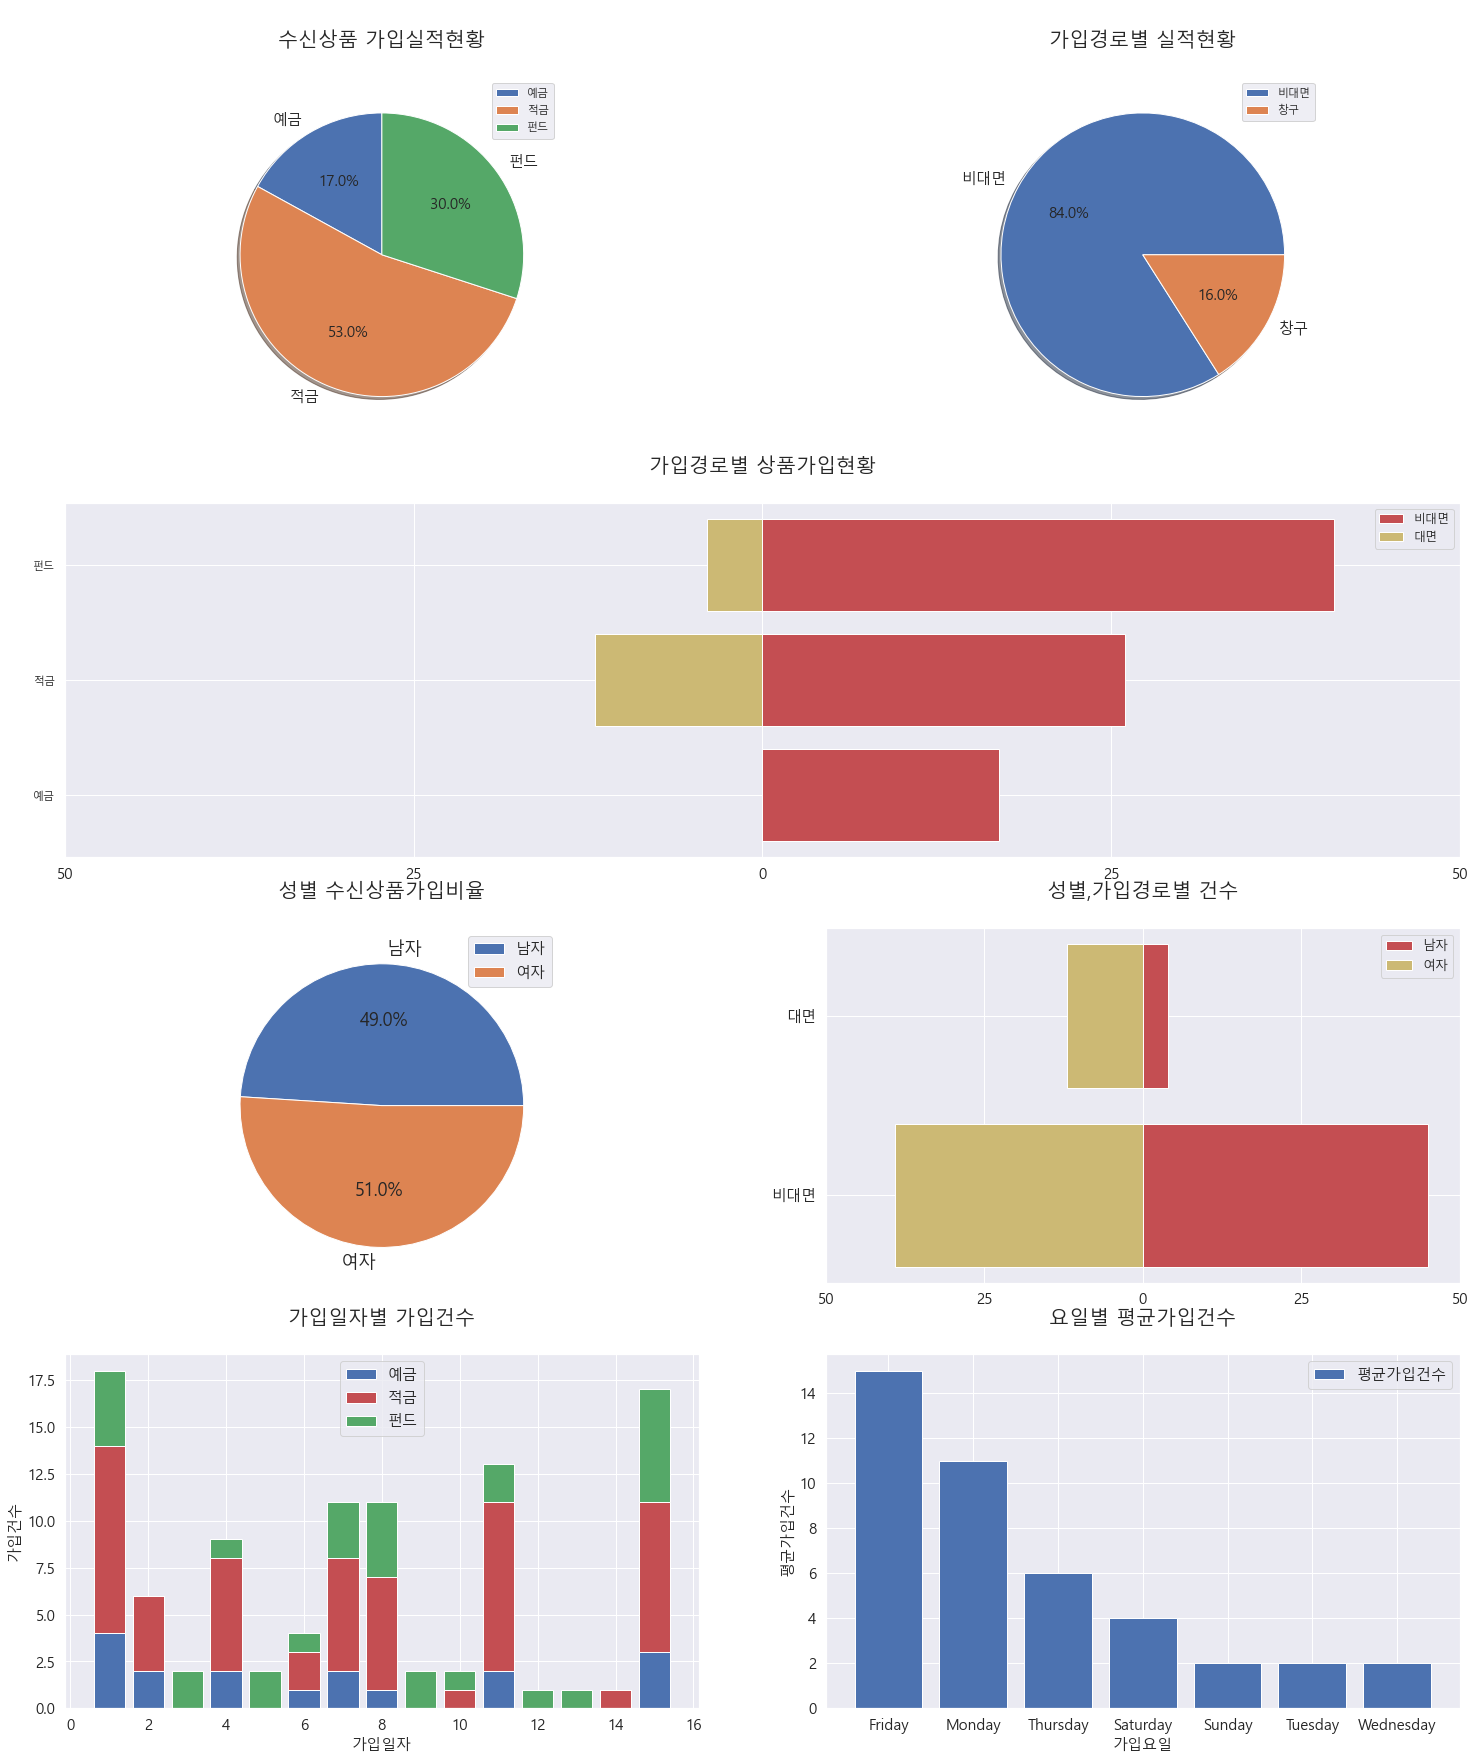

In [23]:
plt.figure(figsize=(25,30))

plt.subplot(421) 
draw_product('y')

plt.subplot(422) 
draw_channel('y')

plt.subplot(412) 
draw_channel('n')

plt.subplot(425) 
draw_sex('y') # 성별 pie
plt.subplot(426) 
draw_sex('n') # 가입경로 bar차트
plt.subplot(427) 
draw_day('일자별') # 일자별 분할차트
plt.subplot(428) 
draw_day('요일별') # 요일별 막대차트
plt.show()